<a href="https://colab.research.google.com/github/MarcoAntonioMeza/passwords_crack/blob/main/Tiempo_para_descifrar_contrase%C3%B1as.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url = '/content/drive/MyDrive/9 A/BD/TI/top_200_password_2020_by_country.csv'

In [ ]:
df = pd.read_csv(url)
df.columns

Index(['country_code', 'country', 'Rank', 'Password', 'User_count',
       'Time_to_crack', 'Global_rank', 'Time_to_crack_in_seconds'],
      dtype='object')

In [ ]:
df.sample(10)

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds
4579,kr,Korea,180,1a2s3d,832,2 minutes,NaN,120
5548,nl,Netherlands,149,newmember,3591,1 Day,NaN,86400
6387,ph,Philippines,188,samsung,2932,< 1 second,78.0,0
809,ca,Canada,10,testing,73114,< 1 second,NaN,0
2957,gr,Greece,158,daniel,812,5 Seconds,69.0,5
6135,no,Norway,136,creative,1166,< 1 second,NaN,0
2639,de,Germany,40,abc,126913,< 1 second,NaN,0
6930,ro,Romania,131,vladut,3073,2 Minutes,NaN,120
4533,kr,Korea,134,flower,1114,< 1 second,NaN,0
9576,us,United States,177,qazwsx,54714,< 1 second,43.0,0


In [ ]:
df['Horas_completas'] = df['Time_to_crack_in_seconds'].apply(lambda seg: seg // 3600)
fil = df['country'] == 'Mexico'
#df[fil]['Horas_completas'].mean()
df[fil][:10]

,country_code,country,Rank,Password,User_count,Time_to_crack,Global_rank,Time_to_crack_in_seconds,Horas_completas
5200,mx,Mexico,1,123456,375650,< 1 second,1.0,0,0
5201,mx,Mexico,2,123456789,161265,< 1 second,2.0,0,0
5202,mx,Mexico,3,12345,73779,< 1 second,3.0,0,0
5203,mx,Mexico,4,mexico,51359,< 1 second,NaN,0,0
5204,mx,Mexico,5,12345678,51077,< 1 second,6.0,0,0
5205,mx,Mexico,6,1234567,39008,< 1 second,10.0,0,0
5206,mx,Mexico,7,1234567890,34767,< 1 second,9.0,0,0
5207,mx,Mexico,8,hola,28711,3 Hours,NaN,10800,3
5208,mx,Mexico,9,america,27980,2 Minutes,NaN,120,0
5209,mx,Mexico,10,1234,26195,< 1 second,17.0,0,0


In [ ]:
cols = ['country','Time_to_crack_in_seconds']

df = df.drop(columns = [col for col in df.columns if col not in cols])
df.sample(10)


,country,Time_to_crack_in_seconds
8302,Switzerland,0
9201,United Kingdom,0
1227,China,10
9251,United Kingdom,0
6103,Norway,10800
6688,Portugal,10
6893,Romania,120
5686,New Zealand,120
7801,Spain,0
7893,Spain,120


In [ ]:
group = df.groupby('country')
group
#pd.set_option('display.float_format', '{:.2f}'.format)
#dias = 86400 horas =3600

In [ ]:
summary = group['Time_to_crack_in_seconds'].agg(['mean'])
summary['promedio_horas'] = summary['mean'].apply(lambda seg: int(seg //3600))
sort = summary.sort_values(by='mean', ascending=False)
sort.head(10)

,mean,promedio_horas
country,,
Indonesia,4.351774e+07,12088
Brazil,1.613735e+07,4482
Chile,7.088719e+06,1969
Vietnam,6.344825e+06,1762
Portugal,6.186351e+06,1718
Spain,5.676283e+06,1576
Canada,4.998296e+06,1388
Turkey,3.809403e+06,1058
India,1.105793e+06,307


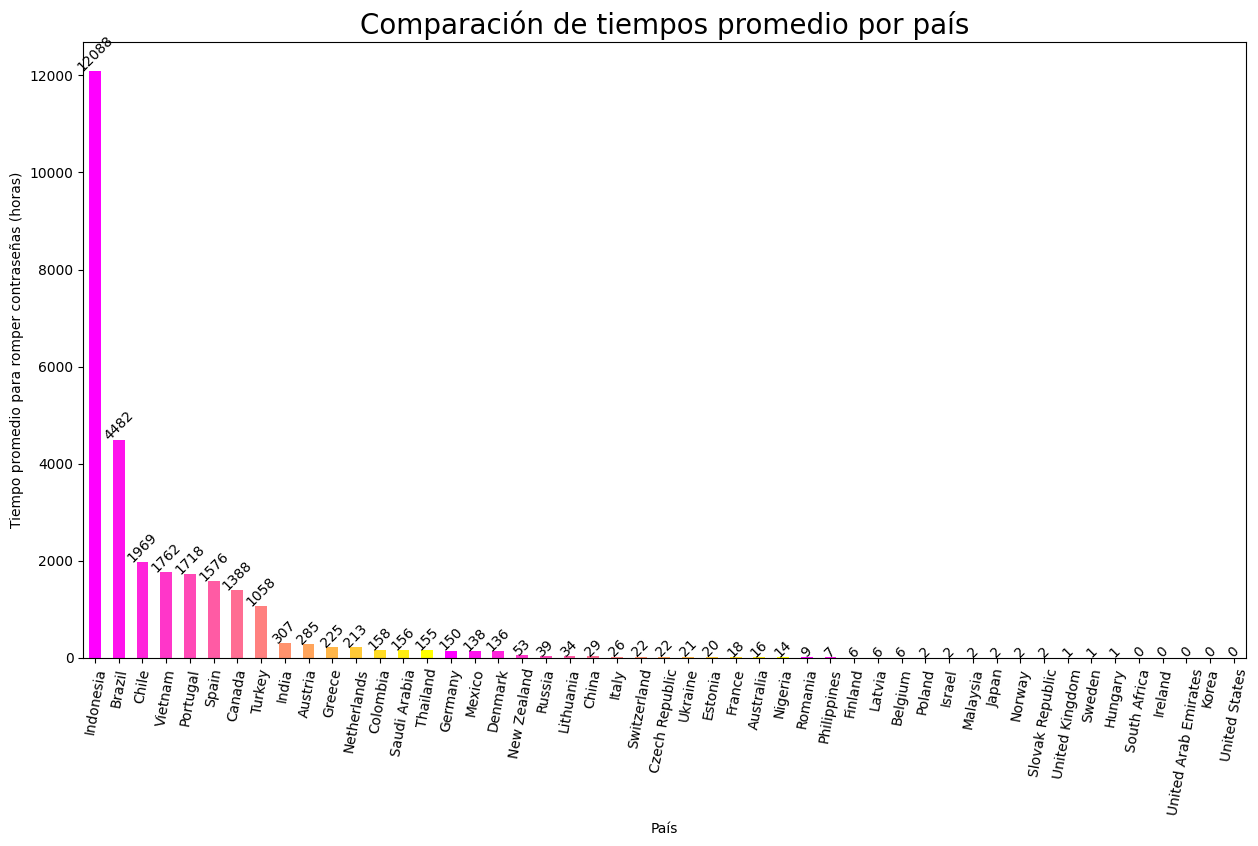

In [ ]:
# Gráfico de barras para comparar los tiempos promedio entre regiones
plt.rcParams['figure.figsize'] = (10,5)
color = plt.cm.spring(np.linspace(0,1,15))

plt.title('Comparación de tiempos promedio por país', fontsize=20)

data = sort['promedio_horas']

data.plot.bar(color= color ,figsize = (15,8))
plt.xlabel('País')
plt.ylabel('Tiempo promedio para romper contraseñas (horas)')

for i, value in enumerate(data):
    plt.text(i, value + 5, str(value), ha='center',rotation=45)

plt.xticks(rotation=80)
plt.show()

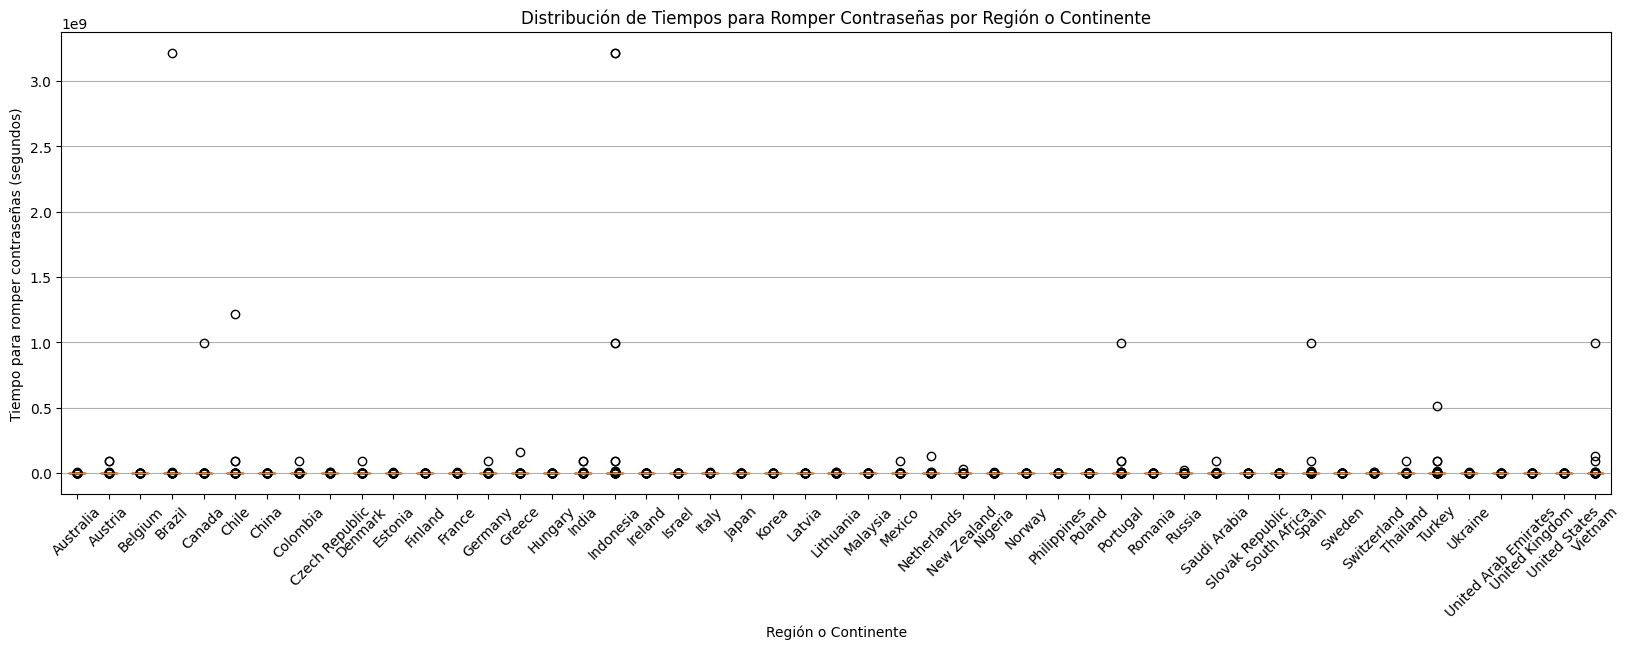

In [ ]:
# Boxplot para mostrar la distribución y los valores atípicos de los tiempos para romper contraseñas en cada región
plt.figure(figsize=(20, 6))
plt.boxplot([group.get_group(name)['Time_to_crack_in_seconds'] for name, _ in group], labels=group.groups.keys())
plt.xlabel('Región o Continente')
plt.ylabel('Tiempo para romper contraseñas (segundos)')
plt.title('Distribución de Tiempos para Romper Contraseñas por Región o Continente')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()